In [52]:

import pandas as pd

file_path = r"C:\Users\ricky\Downloads\restaurants_davis2.csv"
df = pd.read_csv(file_path)

df.head()
df["Cuisine/Type"].head(10).to_list()


['American',
 'Italian',
 'American',
 'Italian',
 'Japanese, Sushi',
 'Lebanese, Mediterranean',
 'Asian, Thai',
 'American, Breakfast',
 'American, Pizza',
 'Chinese, Asian']

In [53]:
df["Cuisine_List"] = df["Cuisine/Type"].str.split(r",\s*")
print(df["Cuisine_List"].head(10).to_list())


[['American'], ['Italian'], ['American'], ['Italian'], ['Japanese', 'Sushi'], ['Lebanese', 'Mediterranean'], ['Asian', 'Thai'], ['American', 'Breakfast'], ['American', 'Pizza'], ['Chinese', 'Asian']]


In [54]:
df["Cuisine_List"] = df["Cuisine/Type"].str.split(r",\s*")

In [102]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

cuisine_dummies = pd.DataFrame(
    mlb.fit_transform(df["Cuisine_List"]),
    columns=mlb.classes_,
    index=df.index
)

df = pd.concat([df, cuisine_dummies], axis=1)
sorted(mlb.classes_)

['American',
 'Asian',
 'Bakery',
 'Bar',
 'Boba',
 'Breakfast',
 'Burmese',
 'Cafe',
 'Cajun&Creole',
 'Candy',
 'Chinese',
 'Chocolate',
 'Conviniencestore',
 'Cookies',
 'Deli',
 'Donuts',
 'Fast Food',
 'Hawaiian',
 'Healthy',
 'Indian',
 'Israeli',
 'Italian',
 'Japanese',
 'Juice',
 'Korean',
 'Lebanese',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Middleeastern',
 'Moroccan',
 'Nepali',
 'Persian',
 'Pizza',
 'Seafood',
 'Smoothie',
 'Southwestern',
 'Supermarket',
 'Sushi',
 'Taiwanese',
 'Tea',
 'Thai',
 'UCDavis',
 'Vietnamese',
 'Yogurt']

In [57]:
df.loc[:5, ["Cuisine/Type"] + list(mlb.classes_)]


,Cuisine/Type,American,Asian,Bakery,Bar,Boba,Breakfast,Burmese,Cafe,Cajun&Creole,...,Smoothie,Southwestern,Supermarket,Sushi,Taiwanese,Tea,Thai,UCDavis,Vietnamese,Yogurt
0,American,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,American,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Japanese, Sushi",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,"Lebanese, Mediterranean",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
m = 30  # minimum reviews
C = df["Rating"].mean()

df["WeightedScore"] = (
    (df["Reviews"] / (df["Reviews"] + m)) * df["Rating"]
    + (m / (df["Reviews"] + m)) * C
)
df[["Restaurant Name", "Rating", "Reviews", "WeightedScore"]].head(10)

,Restaurant Name,Rating,Reviews,WeightedScore
0,The Mustard Seed,4.3,226,4.271899
1,Osteria Fasulo,4.3,148,4.259585
2,Burgers & Brew,4.2,434,4.190961
3,Paesano's,4.0,148,4.010147
4,Mikuni Japanese Restaurant & Sushi Bar,4.3,106,4.247104
5,Sam's Cuisine,4.5,44,4.321704
6,Sophia's Thai Kitchen,4.1,136,4.092808
7,Black Bear Diner,4.0,182,4.008519
8,Woodstock's Pizza Davis,4.1,135,4.092764
9,Dumpling House,4.1,55,4.085954


In [73]:
df.sort_values("WeightedScore", ascending=False)[
    ["Restaurant Name", "Rating", "Reviews", "WeightedScore"]
].head(15)


,Restaurant Name,Rating,Reviews,WeightedScore
11,Taqueria Davis,4.5,70,4.368061
19,Tea List,4.7,27,4.363265
21,Lamppost Pizza,4.7,21,4.323649
5,Sam's Cuisine,4.5,44,4.321704
0,The Mustard Seed,4.3,226,4.271899
1,Osteria Fasulo,4.3,148,4.259585
4,Mikuni Japanese Restaurant & Sushi Bar,4.3,106,4.247104
44,The Davis Beer Shoppe,4.5,20,4.236122
10,Wok of Flame,4.3,69,4.227335
29,Tommy J's Grill & Catering,4.5,18,4.225128


In [74]:
df["WeightedScore"].mean()


4.056340446606281

In [75]:
df[["Rating", "WeightedScore"]].describe()


,Rating,WeightedScore
count,98.000000,98.000000
mean,4.060204,4.056340
std,0.559591,0.130510
min,2.700000,3.569349
25%,3.800000,3.992617
50%,4.000000,4.058262
75%,4.500000,4.111945
max,5.000000,4.368061


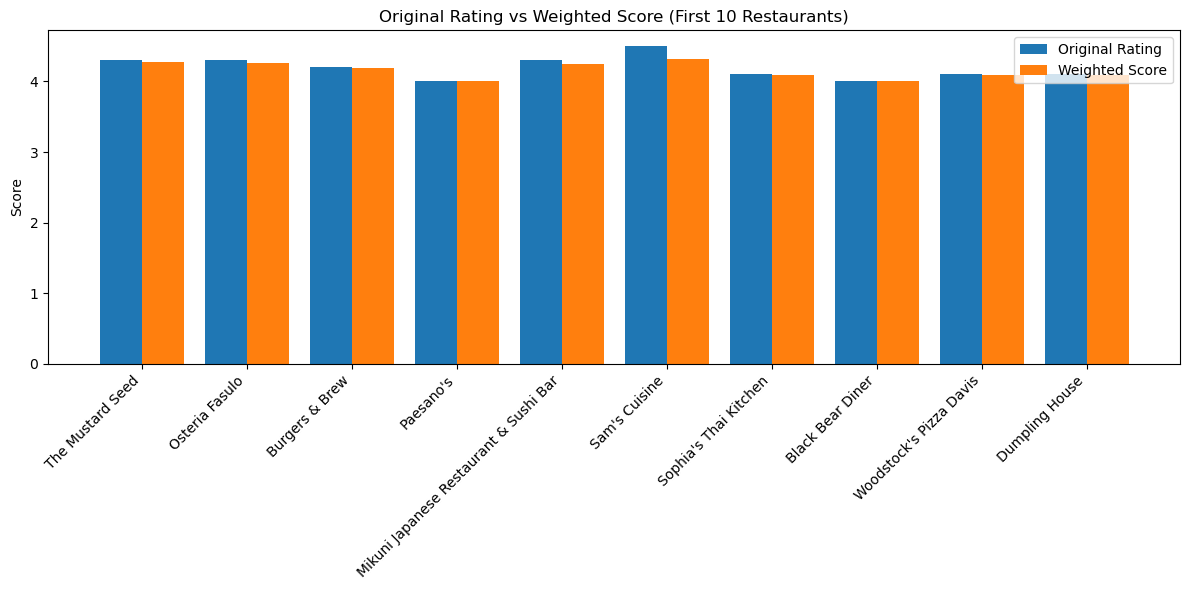

In [76]:
import matplotlib.pyplot as plt
import numpy as np

sample_df = df.head(10).copy()

x = np.arange(len(sample_df))   
width = 0.4                    

plt.figure(figsize=(12, 6))

plt.bar(x - width/2, sample_df["Rating"],       width=width, label="Original Rating")
plt.bar(x + width/2, sample_df["WeightedScore"], width=width, label="Weighted Score")

plt.xticks(x, sample_df["Restaurant Name"], rotation=45, ha="right")

plt.ylabel("Score")
plt.title("Original Rating vs Weighted Score (First 10 Restaurants)")
plt.legend()
plt.tight_layout()
plt.show()


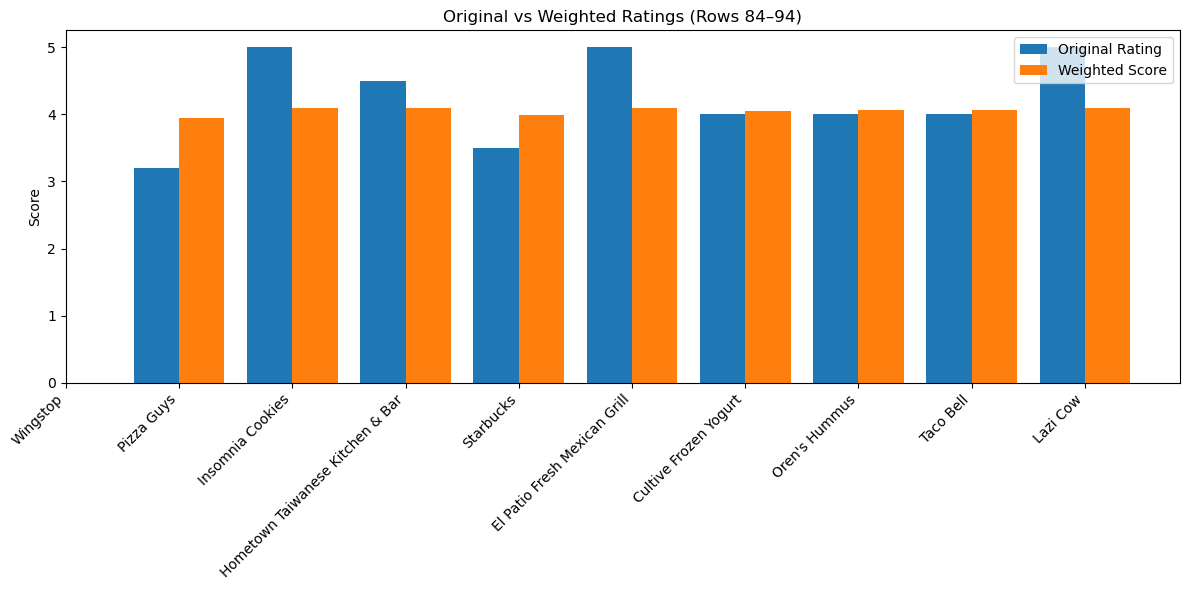

In [77]:
start = 84
end = 94

sample_df = df.iloc[start:end].copy()

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(sample_df))
width = 0.4

plt.figure(figsize=(12, 6))

plt.bar(x - width/2, sample_df["Rating"],        width=width, label="Original Rating")
plt.bar(x + width/2, sample_df["WeightedScore"], width=width, label="Weighted Score")

plt.xticks(x, sample_df["Restaurant Name"], rotation=45, ha="right")
plt.ylabel("Score")
plt.title(f"Original vs Weighted Ratings (Rows {start}–{end})")
plt.legend()
plt.tight_layout()
plt.show()


In [104]:
import folium

center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=(
            f"<b>{row['Restaurant Name']}</b><br>"
            f"Rating: {row['Rating']}<br>"
            f"Weighted score: {row['WeightedScore']:.2f}<br>"
            f"Reviews: {row['Reviews']}"
        )
    ).add_to(m)

m.save("davis_restaurants_map.html")

from IPython.display import IFrame
IFrame("davis_restaurants_map.html", width=800, height=600)


In [109]:
def color_for_score(score):
    if score >= 4.4:
        return "green"
    elif score >= 4.1:
        return "blue"
    else:
        return "red"

m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=6,
        color=color_for_score(row["WeightedScore"]),
        fill=True,
        fill_opacity=0.8,
        popup=(
            f"<b>{row['Restaurant Name']}</b><br>"
            f"Rating: {row['Rating']}<br>"
            f"Weighted score: {row['WeightedScore']:.2f}<br>"
            f"Reviews: {row['Reviews']}"
        )
    ).add_to(m)

m.save("davis_restaurants_map_weighted.html")


In [111]:
from IPython.display import IFrame
IFrame("davis_restaurants_map_weighted.html", width=800, height=600)


In [107]:
import numpy as np

df["Price Level"] = df["Price Level"].astype(str).str.strip()
df["Price Level"] = df["Price Level"].str.replace(u"\xa0", "", regex=False)
df["Price Level"].head(10).to_list()

['$$$$',
 '$$$$',
 '$$ - $$$',
 '$$ - $$$',
 '$$ - $$$',
 '$',
 '$$ - $$$',
 '$$ - $$$',
 '$$ - $$$',
 '$']

In [108]:
def price_to_num(x):
    if x == "$":
        return 1
    elif x == "$$ - $$$":
        return 2.5
    elif x == "$$$$":
        return 4
    else:
        return np.nan

df["PriceNum"] = df["Price Level"].apply(price_to_num)
df["PriceNum"].head(10).to_list()


[4.0, 4.0, 2.5, 2.5, 2.5, 1.0, 2.5, 2.5, 2.5, 1.0]

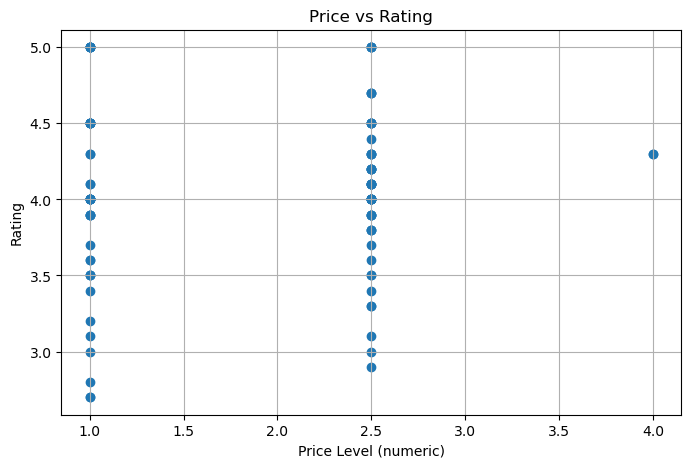

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df["PriceNum"], df["Rating"])
plt.xlabel("Price Level (numeric)")
plt.ylabel("Rating")
plt.title("Price vs Rating")
plt.grid(True)
plt.show()



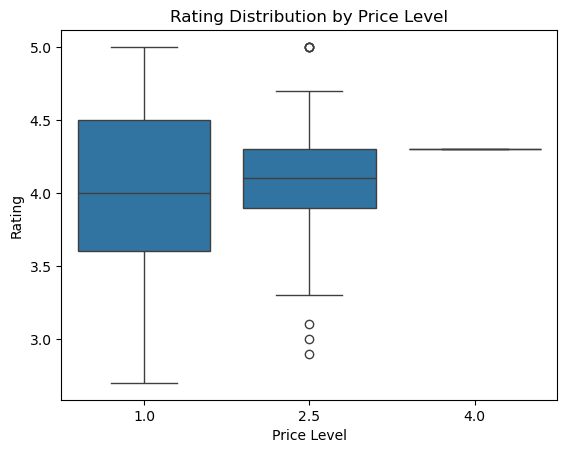

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["PriceNum"], y=df["Rating"])
plt.xlabel("Price Level")
plt.ylabel("Rating")
plt.title("Rating Distribution by Price Level")
plt.show()


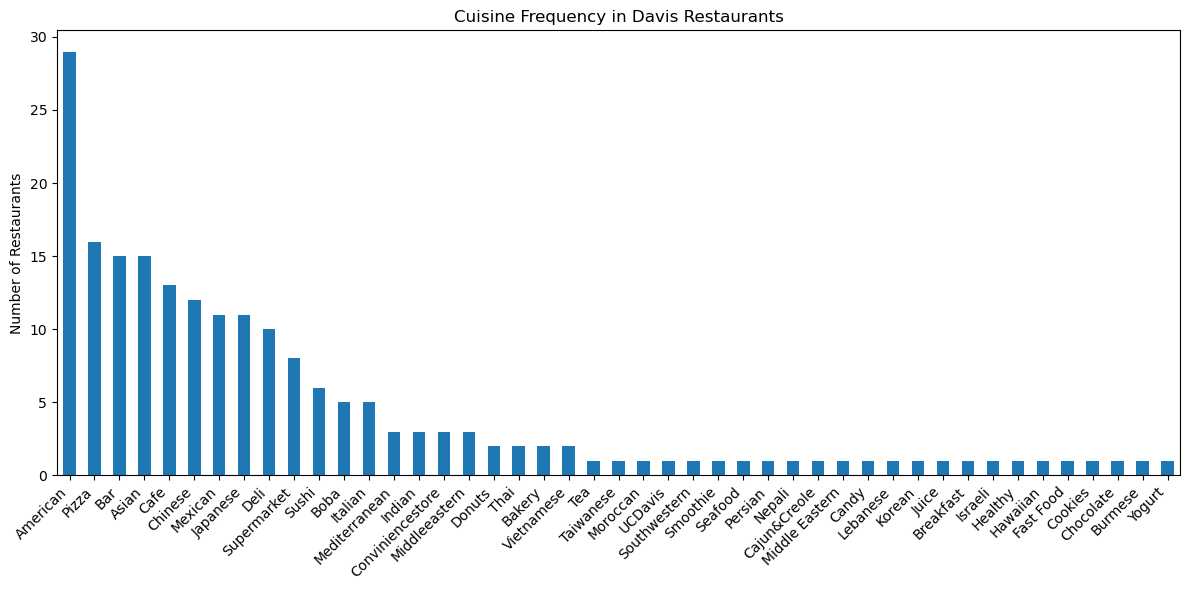

In [98]:
import matplotlib.pyplot as plt

# All cuisine dummy columns
cuisine_cols = [c for c in df.columns if c in [
    'American','Asian','Bakery','Bar','Boba','Breakfast','Burmese','Cafe',
    'Cajun&Creole','Candy','Chinese','Chocolate','Conviniencestore','Cookies',
    'Deli','Donuts','Fast Food','Hawaiian','Healthy','Indian','Israeli',
    'Italian','Japanese','Juice','Korean','Lebanese','Mediterranean','Mexican',
    'Middle Eastern','Middleeastern','Moroccan','Nepali','Persian','Pizza',
    'Seafood','Smoothie','Southwestern','Supermarket','Sushi','Taiwanese',
    'Tea','Thai','UCDavis','Vietnamese','Yogurt'
]]

# Count how many restaurants serve each cuisine
cuisine_counts = df[cuisine_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
cuisine_counts.plot(kind="bar")
plt.title("Cuisine Frequency in Davis Restaurants")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [99]:
avg_rating_by_cuisine = {}

for cuisine in cuisine_cols:
    avg_rating_by_cuisine[cuisine] = df[df[cuisine] == 1]["WeightedScore"].mean()

avg_rating_by_cuisine = pd.Series(avg_rating_by_cuisine).sort_values(ascending=False)
avg_rating_by_cuisine.head(10), avg_rating_by_cuisine.tail(10)


(Tea              4.363265
 Lebanese         4.321704
 Hawaiian         4.216837
 Burmese          4.168321
 Mediterranean    4.154049
 Bar              4.132955
 Moroccan         4.118941
 Seafood          4.111945
 Supermarket      4.090520
 Cookies          4.090520
 dtype: float64,
 Korean              3.870153
 Nepali              3.862449
 Vietnamese          3.700128
 Candy                    NaN
 Chocolate                NaN
 Conviniencestore         NaN
 Juice                    NaN
 Persian                  NaN
 Smoothie                 NaN
 UCDavis                  NaN
 dtype: float64)

In [101]:
df["ValueScore"] = df["WeightedScore"] / df["PriceNum"]

best_value = df.sort_values("ValueScore", ascending=False)[
    ["Restaurant Name", "WeightedScore", "PriceNum", "Reviews", "ValueScore"]
].head(15)

best_value



,Restaurant Name,WeightedScore,PriceNum,Reviews,ValueScore
11,Taqueria Davis,4.368061,1.0,70,4.368061
5,Sam's Cuisine,4.321704,1.0,44,4.321704
29,Tommy J's Grill & Catering,4.225128,1.0,18,4.225128
30,Taqueria Guadalajara Grill,4.221806,1.0,62,4.221806
47,Teabo Café,4.145640,1.0,3,4.145640
43,Cenario's Pizza,4.145640,1.0,3,4.145640
23,Guads Tacos And Beer,4.111945,1.0,4,4.111945
78,Ike's Place,4.111945,1.0,4,4.111945
86,Insomnia Cookies,4.090520,1.0,1,4.090520
89,El Patio Fresh Mexican Grill,4.090520,1.0,1,4.090520
